<a href="https://colab.research.google.com/github/anandhu013/anandhu013/blob/main/MNIST_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.9991 - acc: 0.7269 - val_loss: 0.5275 - val_acc: 0.8561
Epoch 2/10
1875/1875 [=======================

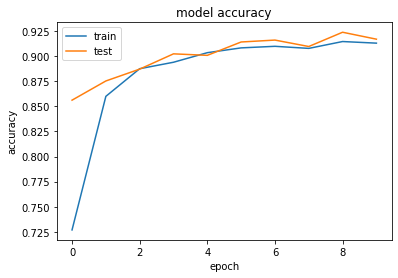

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7266 - acc: 0.5968 - val_loss: 0.7804 - val_acc: 0.7793
Epoch 2/10
1875/1875 [=====================

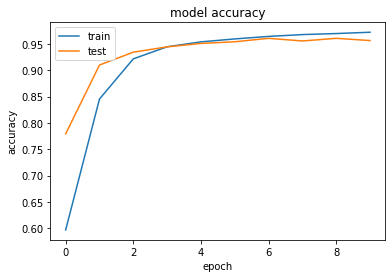

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

def model_1():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(learning_rate=0.01)

  # model.summary()

  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
  return model

def evaluate_model(modelX):
    scores = list()
    # define model
    model = modelX()
    print(model.summary())
    # fit model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=1)
    print('Validation Accuarcy %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    return scores, history
    
def plot(history):  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

scores, history = evaluate_model(model_1)

plot(history)

def model_2():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  opt = Adam(learning_rate=0.01)

  # model.summary()

  model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
  return model


scores, history = evaluate_model(model_2)

plot(history)